In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


### Part 1

In [60]:
cols_name = ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'Genus']
data = pd.read_csv("Q1Data.csv", usecols = cols_name)
data.head(10)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,Genus
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,Adenomera
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,Adenomera
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,Adenomera
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,Adenomera
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,Adenomera
5,0.099704,-0.033408,0.349895,0.344535,0.247569,0.022407,Adenomera
6,0.021676,-0.062075,0.318229,0.380439,0.179043,-0.041667,Adenomera
7,0.145130,-0.033660,0.284166,0.279537,0.175211,0.005791,Adenomera
8,0.271326,0.027777,0.375738,0.385432,0.272457,0.098192,Adenomera
9,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,Adenomera


In [61]:
label_encoder = LabelEncoder()

x = data.drop('Genus', axis=1)
y = data['Genus']
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

print("Training Set:")
print(X_train.head(5))
print(y_train[:5])

print("\nTesting Set:")
print(X_test.head(5))
print(y_test[:5])

Training Set:
      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6
1279  0.190114  0.496089  0.784331  0.025337  0.042480 -0.027782
7169  0.209224  0.625373  0.246565 -0.108078  0.174846  0.100347
7048 -0.201657  0.944845  0.742481 -0.087429 -0.048270  0.098684
1555  0.182197  0.152127  0.593357  0.239246  0.030833 -0.183602
6502  0.277572  0.386568  0.258894  0.086539  0.198287  0.056845
[0 7 7 0 3]

Testing Set:
      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6
3340  0.147506  0.014843  0.433466  0.169581  0.053135 -0.152020
5108  0.674174  0.767520  0.392177  0.035669  0.181548 -0.013677
6524 -0.007777  0.363276  0.413224  0.196296  0.222389  0.097128
3649  0.429359  0.297881  0.609120  0.263991 -0.030414 -0.160778
1617  0.190599  0.062234  0.617262  0.208825  0.027108 -0.214441
[0 3 3 0 0]


In [62]:
# convert to array
X_train = X_train.values 
X_test = X_test.values
len(X_train), len(y_train), len(X_test), len(y_test)

(1439, 1439, 5756, 5756)

In [63]:
class Node: 

    # The feature attribute of Node tells us which categorical value / feature it is checking
    # The threshold value is the value that dictates whether we go to the left or right from this node
    # left_child and right_child: Children nodes for decisions.
    # value: Assigned if the node is a leaf, representing the predicted class.

    def __init__(self, feature=None, threshold=None, left_child=None, right_child=None, *, value=None):

        self.feature = feature
        self.threshold = threshold
        self.left_child = left_child
        self.right_child = right_child
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:

    # min_samples_split: Minimum number of samples required to split a node.
    # max_depth: Maximum depth of the tree.
    # n_features: Number of features to consider for each split.
    # root: The root node of the decision tree.

    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):

        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None


    def fit(self, X, y):

        # If n_features not specified, takes all features.
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self.grow_tree(X, y)


    def grow_tree(self, X,y, depth = 0):
        n_samples, n_feats = X.shape

        # number of unique labels that can be assigned
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            
            # if criteria met, we create a leaf node with most common label and return it
            counter = Counter(y)
            value = counter.most_common(1)[0][0]
            leaf_value = value
            return Node(value=leaf_value)
        
        # Randomly select a subset of features for consideration in the split to introduce randomness and preventing overfitting.

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False) # sampling without replacement

        # find the best split ( for feature as well as threshold)
        best_feature, best_thresh = self.best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self.split(X[:, best_feature], best_thresh)

        # left_idxs: Indices of samples where the feature value is less than or equal to the threshold.
        # right_idxs: Indices of samples where the feature value is greater than the threshold.

        left = self.grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self.grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)

    def best_split(self, X, y, feature_indices):
        best_gain = -1
        split_idx, split_threshold = None, None
        
        # loop through selected features
        for feat_idx in feature_indices:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self.information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold
    
    def information_gain(self, y, X_column, threshold):
        parent_entropy = self.calc_entropy(y)
        left_idxs, right_idxs = self.split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children

        n = len(y)
        n_left, n_right = len(left_idxs), len(right_idxs)
        left_entropy = self.calc_entropy(y[left_idxs])
        right_entropy = self.calc_entropy(y[right_idxs])

        child_entropy = (n_left/n) * left_entropy + (n_right/n) *right_entropy

        # info gain
        info_gain = parent_entropy - child_entropy
        return info_gain

    def split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def calc_entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        sum = 0
        for p in ps:
            if p>0:
                sum += p*np.log(p)
        
        return -1*sum
      
    def predict(self, X):
        X = np.array(X)
        return np.array([self.traverse_tree(x, self.root) for x in X])

    def traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self.traverse_tree(x, node.left_child)
        return self.traverse_tree(x, node.right_child)
    

In [64]:
def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred)/len(y_test)

In [65]:
my_tree_accuracy = []

for k in range(1,16):
    tree = DecisionTree(max_depth=k)
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    acc = accuracy(y_test, predictions)
    my_tree_accuracy.append(acc)

my_tree_accuracy = [value * 100 for value in my_tree_accuracy]
my_tree_accuracy = [round(value, 3) for value in my_tree_accuracy]

In [66]:
for i in range(1, 16):
    print("For Tree Depth:", i, "accuracy is:", my_tree_accuracy[i-1], "%")

For Tree Depth: 1 accuracy is: 69.267 %
For Tree Depth: 2 accuracy is: 75.643 %
For Tree Depth: 3 accuracy is: 80.212 %
For Tree Depth: 4 accuracy is: 82.887 %
For Tree Depth: 5 accuracy is: 85.737 %
For Tree Depth: 6 accuracy is: 87.179 %
For Tree Depth: 7 accuracy is: 88.395 %
For Tree Depth: 8 accuracy is: 88.76 %
For Tree Depth: 9 accuracy is: 88.482 %
For Tree Depth: 10 accuracy is: 88.777 %
For Tree Depth: 11 accuracy is: 88.621 %
For Tree Depth: 12 accuracy is: 88.482 %
For Tree Depth: 13 accuracy is: 88.899 %
For Tree Depth: 14 accuracy is: 88.429 %
For Tree Depth: 15 accuracy is: 88.655 %


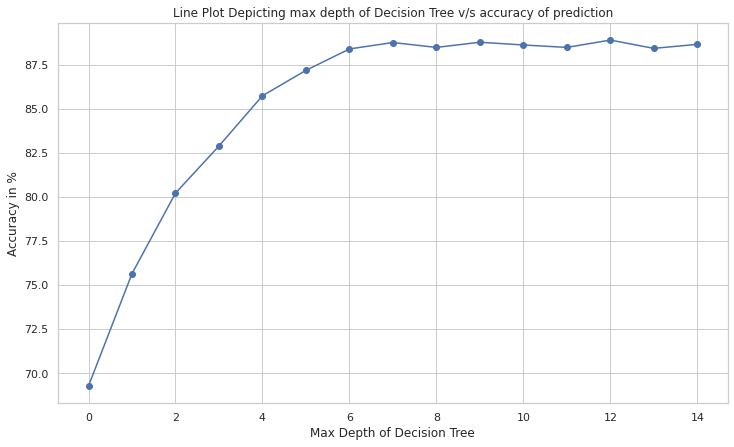

In [67]:
plt.figure(figsize=(12,7))

plt.plot(my_tree_accuracy,'-o')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy in %')
plt.title('Line Plot Depicting max depth of Decision Tree v/s accuracy of prediction')
plt.grid(True)

plt.show()

### *Observations*:

##### **Overfitting and Underfitting** : 
1. The accuracy plot reveals an initial rise in accuracy as the tree depth increases, with the value being very low, around 60% at depth 1 and increasing till depth 7. This initial rise in accuracy is indicative of the model learning and capturing more intricate patterns present in the training data. As the depth increases, the decision tree becomes more capable of representing complex relationships within the dataset.

2. We note that the accuracy becomes more or less stable with a minor decrease, after depth value 8 in the plot. This suggests that the model might be overfitting to the traning data. 

3. We can conclude that balancing model complexity is crucial. Too simple models (underfitting) may not capture essential patterns, while overly complex models (overfitting) may fit noise in the training data.

### Part 2

In [68]:
data = pd.read_csv("Q1Data.csv")
data = data.drop(('Species'), axis = 1)
data = data.drop(('Family'), axis = 1)
data.head(10)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,Genus
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Adenomera
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Adenomera
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Adenomera
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Adenomera
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Adenomera
5,0.099704,-0.033408,0.349895,0.344535,0.247569,0.022407,-0.213767,-0.127916,0.277353,0.309861,...,0.012486,0.180641,0.055242,-0.080487,-0.130089,-0.171478,-0.071569,0.077643,0.064903,Adenomera
6,0.021676,-0.062075,0.318229,0.380439,0.179043,-0.041667,-0.252300,-0.167117,0.220027,0.260326,...,0.027070,0.216923,0.064853,-0.046620,-0.055146,-0.085972,-0.009127,0.065630,0.044040,Adenomera
7,0.145130,-0.033660,0.284166,0.279537,0.175211,0.005791,-0.183329,-0.158483,0.192567,0.264184,...,-0.009015,0.184266,0.075654,-0.055978,-0.048219,-0.056637,-0.022419,0.070085,0.021419,Adenomera
8,0.271326,0.027777,0.375738,0.385432,0.272457,0.098192,-0.173730,-0.157857,0.207181,0.269932,...,-0.044984,0.064425,-0.032167,-0.120723,-0.112607,-0.156933,-0.118527,-0.002471,0.002304,Adenomera
9,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,-0.294179,-0.223236,0.268435,0.367813,...,0.042678,0.236484,0.053436,-0.051073,-0.052568,-0.111338,-0.040014,0.090204,0.088025,Adenomera


##### **Extracting only 40% dataset (30% train, 10% test)**

In [69]:
shuffled_df = data.sample(frac=1, random_state=42)
num_rows_to_retain = int(0.4 * len(data))
final_df = shuffled_df.head(num_rows_to_retain)
len(final_df)


2878

In [70]:
x = final_df.drop('Genus', axis=1)
y = final_df['Genus']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
len(X_train), len(X_test)


(2158, 720)

In [71]:
X_train

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_9,MFCCs_10,...,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21
6062,0.121167,0.345887,0.365597,0.202586,0.192510,0.130249,-0.132729,-0.050939,0.114792,0.105270,...,0.109857,-0.065120,-0.123995,0.031767,0.096667,0.021131,-0.002523,-0.032227,-0.078250,-0.004967
1302,0.338480,0.385288,0.518976,0.079309,0.054061,-0.041634,0.072698,0.237241,-0.050752,-0.273244,...,0.381926,-0.233645,-0.281493,0.204308,0.134649,-0.144691,-0.137177,-0.045152,0.127989,0.164102
5962,0.014134,0.452056,0.406797,0.221671,0.362547,0.092186,-0.155484,-0.052735,0.081764,0.130045,...,0.086770,0.001465,-0.172507,0.027466,0.151800,0.029168,-0.013605,-0.003593,-0.039914,-0.015659
3944,0.510708,0.190294,0.485924,0.205332,0.001904,-0.159706,0.077670,0.223442,-0.026183,-0.310245,...,0.342591,0.008426,-0.276362,-0.009857,0.201689,0.044015,-0.133976,-0.180783,0.046053,0.268779
4332,0.209192,0.205236,0.533081,0.236058,0.098457,-0.088750,-0.025224,0.181228,0.018021,-0.142010,...,0.246828,-0.264889,-0.217413,0.197396,0.192562,-0.117222,-0.187887,-0.089245,0.141200,0.179250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,0.267061,0.218453,0.507186,0.197824,0.103342,-0.078768,-0.053164,0.089461,0.012812,-0.155618,...,0.172759,-0.248916,-0.141633,0.205488,0.117397,-0.114518,-0.114267,-0.046915,0.154251,0.213026
1421,0.329680,0.185332,0.542504,0.134651,0.033523,-0.143516,0.030047,0.244518,0.043282,-0.301064,...,0.430764,-0.038745,-0.305012,0.048538,0.247648,0.017944,-0.091910,-0.110655,0.009514,0.164732
3550,0.712128,0.321660,0.554945,0.184697,-0.053018,-0.058813,0.127301,0.225410,-0.037377,-0.296828,...,0.339348,0.014700,-0.252602,0.008153,0.215503,0.073984,-0.067046,-0.060878,0.079208,0.182921
6289,0.524342,0.414749,0.248483,0.051562,0.176146,0.038286,-0.053021,0.115729,0.078435,-0.113342,...,0.105088,-0.067037,-0.051012,0.068055,0.003045,0.006473,0.039946,-0.012359,0.010895,0.084323


In [72]:
X_train = X_train.values
X_test = X_test.values
len(X_train), len(X_test)

(2158, 720)

In [73]:
class KNN_class:
    def __init__(self, k=3):
        self.k = k
        
    def euclidean(self, p1, p2):
        return np.sqrt(np.sum((p1 - p2)**2))
    
    def predict(self, x_train, y, x_input):
        op_labels = []

        for item in x_input:
            # Euclidean distances between that item and all training samples in x_train.
            distances = np.sqrt(np.sum((x_train - item)**2, axis=1))

            # Get indices of k-nearest neighbors
            k_indices = np.argsort(distances)[:self.k]

            # Labels of the k-nearest neighbors
            labels = y[k_indices]

            # Retreiving majority label
            most_common_label = Counter(labels).most_common(1)[0][0]
            op_labels.append(most_common_label)

        return np.array(op_labels)

In [74]:
my_knn_accuracy = []

for k in range(1,50):
    knn = KNN_class(k=k)
    y_pred = knn.predict(X_train, y_train, X_test)
    acc = accuracy_score(y_pred, y_test)
    my_knn_accuracy.append(acc)

my_knn_accuracy = [value*100 for value in my_knn_accuracy]
my_knn_accuracy = [round(value, 3) for value in my_knn_accuracy]

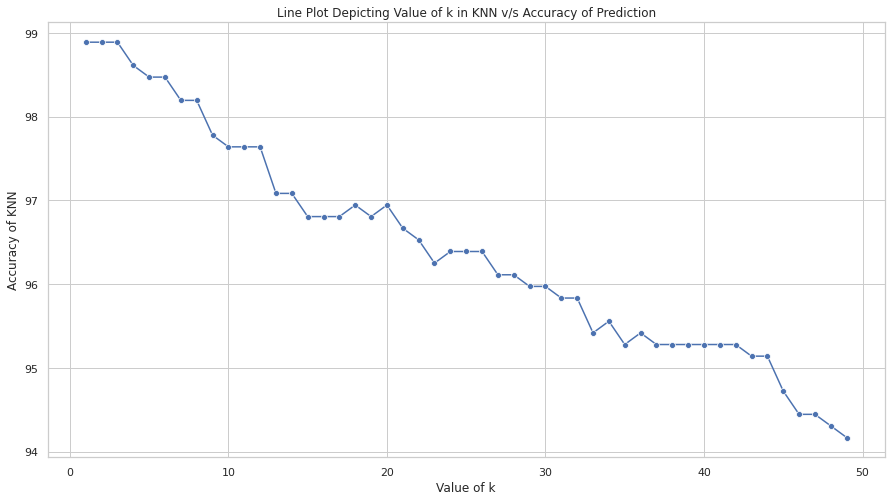

In [75]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

sns.lineplot(x=range(1, 50), y=my_knn_accuracy, marker='o')

plt.xlabel('Value of k')
plt.ylabel('Accuracy of KNN')
plt.title('Line Plot Depicting Value of k in KNN v/s Accuracy of Prediction')

plt.show()

### *Observations*:

1. We notice from the accuracy curve that as value of k in KNN increases, the performance of the model becomes worse. For **k** = 1 the accuracy is highest, which progressively decreases as the value of k increases. 

2. This is because as k increases, the nuances for each point may be considered more vividly, leading to oversmoothening / overfitting of the model.

3. As more and more neighbours are permitted to be checked, we might be deviating from the actual label of the item under consideration.

### Part 3

### Sklearn Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [77]:
data = pd.read_csv("Q1Data.csv")
data = data.drop(('Species'), axis = 1)
data = data.drop(('Family'), axis = 1)
data.head(10)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,Genus
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Adenomera
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Adenomera
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Adenomera
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Adenomera
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Adenomera
5,0.099704,-0.033408,0.349895,0.344535,0.247569,0.022407,-0.213767,-0.127916,0.277353,0.309861,...,0.012486,0.180641,0.055242,-0.080487,-0.130089,-0.171478,-0.071569,0.077643,0.064903,Adenomera
6,0.021676,-0.062075,0.318229,0.380439,0.179043,-0.041667,-0.252300,-0.167117,0.220027,0.260326,...,0.027070,0.216923,0.064853,-0.046620,-0.055146,-0.085972,-0.009127,0.065630,0.044040,Adenomera
7,0.145130,-0.033660,0.284166,0.279537,0.175211,0.005791,-0.183329,-0.158483,0.192567,0.264184,...,-0.009015,0.184266,0.075654,-0.055978,-0.048219,-0.056637,-0.022419,0.070085,0.021419,Adenomera
8,0.271326,0.027777,0.375738,0.385432,0.272457,0.098192,-0.173730,-0.157857,0.207181,0.269932,...,-0.044984,0.064425,-0.032167,-0.120723,-0.112607,-0.156933,-0.118527,-0.002471,0.002304,Adenomera
9,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,-0.294179,-0.223236,0.268435,0.367813,...,0.042678,0.236484,0.053436,-0.051073,-0.052568,-0.111338,-0.040014,0.090204,0.088025,Adenomera


In [78]:
label_encoder = LabelEncoder()
x = data.drop('Genus', axis=1)
y = data['Genus']
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)


In [79]:
in_built_tree_accuracy = []

for depth in range (1,16):
    tree = DecisionTreeClassifier(max_depth = depth)
    tree = tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    in_built_tree_accuracy.append(accuracy)

in_built_tree_accuracy = [value*100 for value in in_built_tree_accuracy]
in_built_tree_accuracy = [round(value, 3) for value in in_built_tree_accuracy]

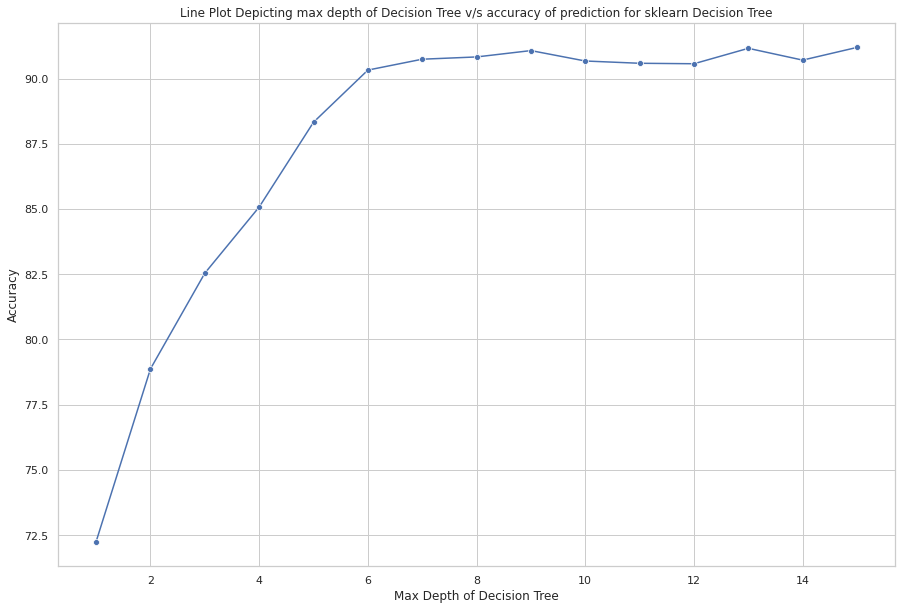

In [80]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=range(1, len(in_built_tree_accuracy) + 1), y=in_built_tree_accuracy, marker='o')

# Adding labels and title for better understanding
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Line Plot Depicting max depth of Decision Tree v/s accuracy of prediction for sklearn Decision Tree')
plt.grid(True)
# Display the plot
plt.show()

### Sklearn KNN

In [81]:
in_built_knn_accuracy = []

for n in range (1,1000):
    neighbour_classifier = KNeighborsClassifier(n_neighbors= n)
    neighbour_classifier = neighbour_classifier.fit(X_train, y_train)
    pred = neighbour_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    in_built_knn_accuracy.append(accuracy)

in_built_knn_accuracy = [value*100 for value in in_built_knn_accuracy]
in_built_knn_accuracy = [round(value, 3) for value in in_built_knn_accuracy]

in_built_knn_accuracy

[98.245,
 97.828,
 97.394,
 97.029,
 96.838,
 96.386,
 96.317,
 96.056,
 95.952,
 95.935,
 95.813,
 95.674,
 95.466,
 95.344,
 95.17,
 95.083,
 94.997,
 94.997,
 94.91,
 94.805,
 94.406,
 94.076,
 93.85,
 93.52,
 93.346,
 93.155,
 92.808,
 92.599,
 92.321,
 92.095,
 91.921,
 91.765,
 91.574,
 91.452,
 91.174,
 91.018,
 90.671,
 90.358,
 90.045,
 89.854,
 89.715,
 89.541,
 89.437,
 89.246,
 89.003,
 88.899,
 88.725,
 88.586,
 88.395,
 88.395,
 88.204,
 88.117,
 87.995,
 87.908,
 87.839,
 87.752,
 87.717,
 87.613,
 87.543,
 87.474,
 87.439,
 87.352,
 87.231,
 87.144,
 87.057,
 86.918,
 86.779,
 86.727,
 86.553,
 86.414,
 86.397,
 86.223,
 86.119,
 86.015,
 85.945,
 85.789,
 85.58,
 85.493,
 85.285,
 85.129,
 84.903,
 84.781,
 84.555,
 84.451,
 84.312,
 84.086,
 83.86,
 83.634,
 83.443,
 83.252,
 83.044,
 82.94,
 82.644,
 82.453,
 82.21,
 82.071,
 81.862,
 81.741,
 81.515,
 81.289,
 81.202,
 81.098,
 80.976,
 80.907,
 80.733,
 80.664,
 80.612,
 80.49,
 80.42,
 80.386,
 80.264,
 80.229,
 8

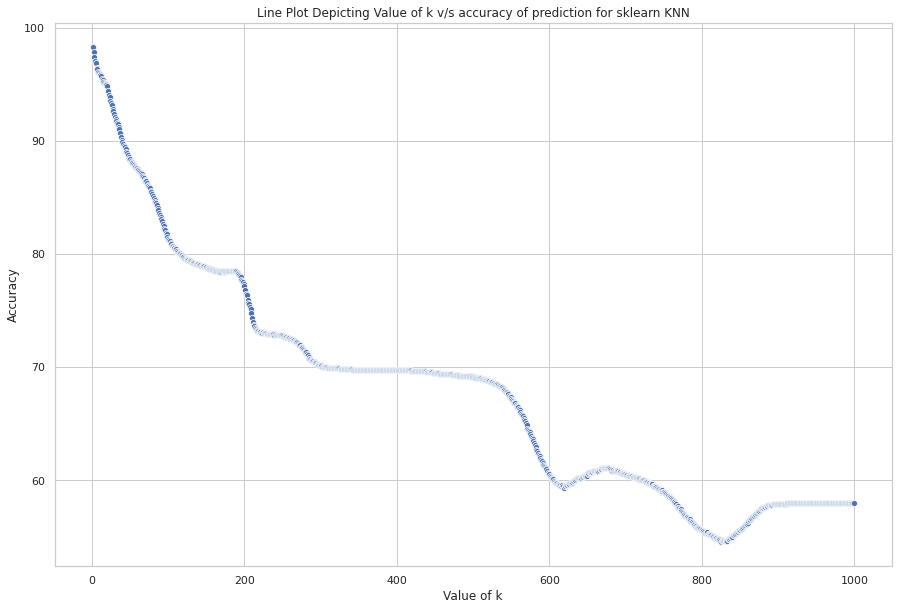

In [82]:
plt.figure(figsize=(15,10))

sns.lineplot(x=range(1, len(in_built_knn_accuracy) + 1), y=in_built_knn_accuracy, marker='o')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('Line Plot Depicting Value of k v/s accuracy of prediction for sklearn KNN')
plt.grid(True)

plt.show()

### Showing all 4 accuracy plots together

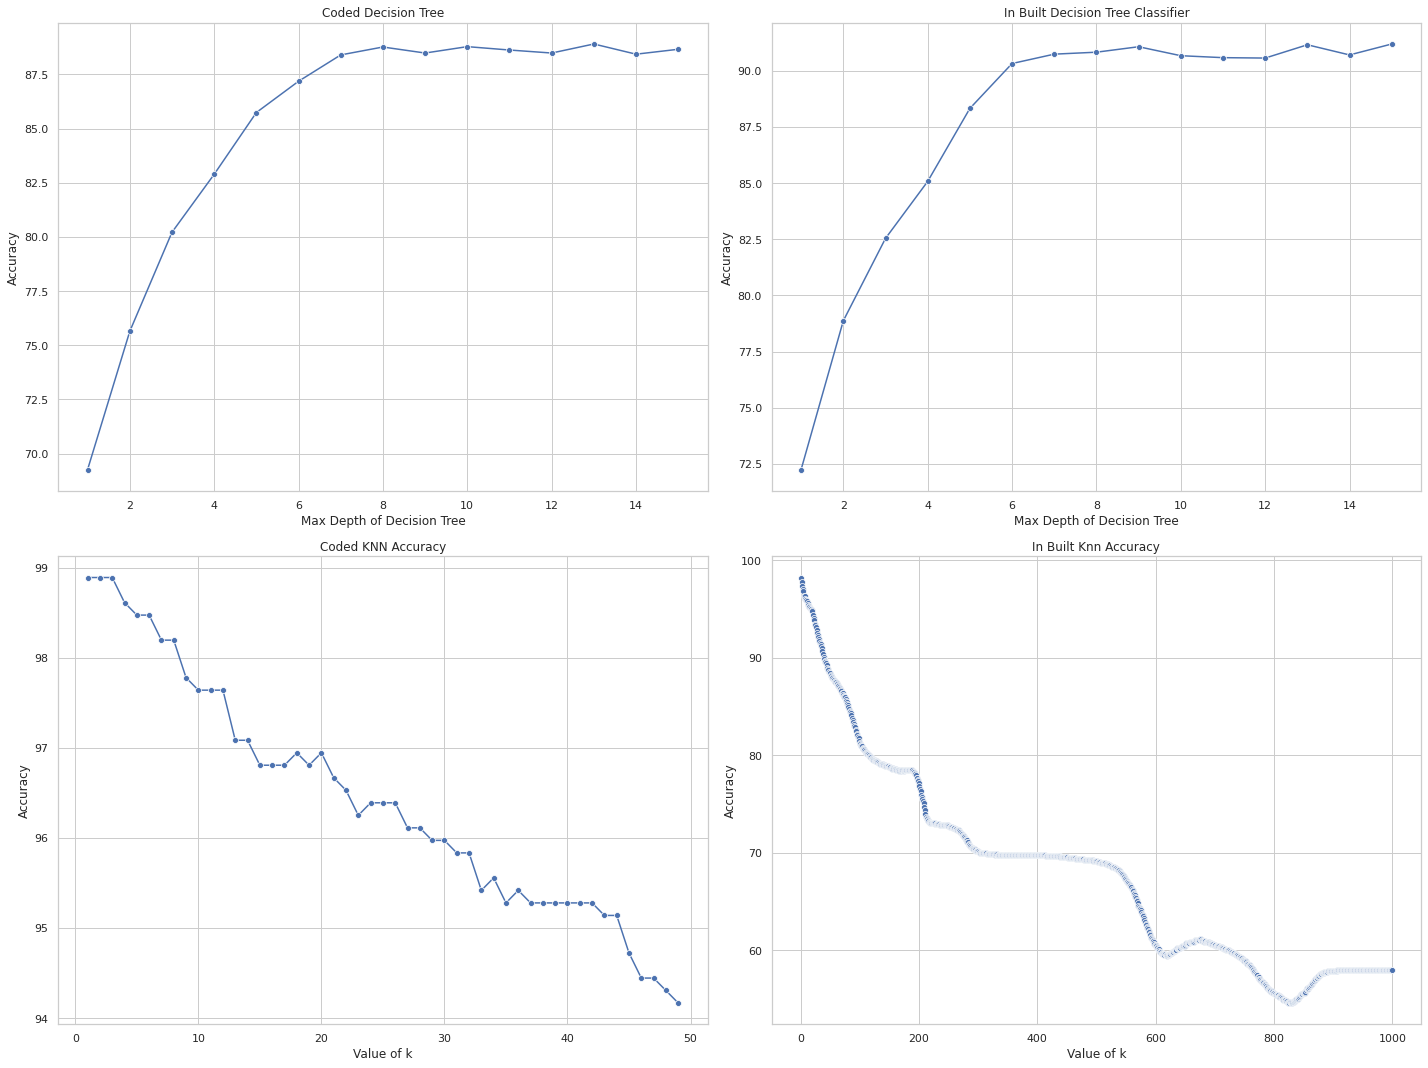

In [83]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.lineplot(x=range(1, len(my_tree_accuracy) + 1), y=my_tree_accuracy, marker='o')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Coded Decision Tree')
plt.grid(True)

plt.subplot(2,2,2)
sns.lineplot(x=range(1, len(in_built_tree_accuracy) + 1), y=in_built_tree_accuracy, marker='o')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('In Built Decision Tree Classifier')
plt.grid(True)

plt.subplot(2,2,3)
sns.lineplot(x=range(1, len(my_knn_accuracy) + 1), y=my_knn_accuracy, marker='o')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('Coded KNN Accuracy')
plt.grid(True)

plt.subplot(2,2,4)
sns.lineplot(x=range(1, len(in_built_knn_accuracy) + 1), y=in_built_knn_accuracy, marker='o')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('In Built Knn Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

### *Observations*
##### 1. ***Decision Tree***:
- We observe a consistent trend in both the in-built and self-coded decision tree models. That is, the accuracy increases with increase in depth initally and becomes more or less stable around depth = 8. 

- However the built-in decision tree shows computational efficiency, in that it executes faster as compared to the self-coded implementation. This could be because built-in libraries leverage optimized, low-level languages

##### 2. ***KNN***:
- Similarly, for KNN both the in-built and self-coded model accuracy curves show a simlar trend. For **k** = 1 the accuracy is highest, which progressively decreases as the value of k increases. This becomes more clear when observing the cost function which we try to minimize for knn - the distance of each point in a cluster from the mean of that cluster, calculated for each cluster.


- Again the sklearn knn model exhibits extreme computational efficiency. It is observed that even in computing for k values from 1 to 1000 using the sklearn model, the time taken is around 7 mins.

##### 3. ***Opposing performance as parameter increases***:
- We note that KNN and Decision Tree exhibits opposite accuracy curves as we increase the parameters for both (max-depth for DT and K-value for KNN). Accuracy of Decision Tree increases with depth of tree upto a certain threshold and accuracy of KNN decreases as k value increases.